por Felipe Miyazato

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Atividade 63

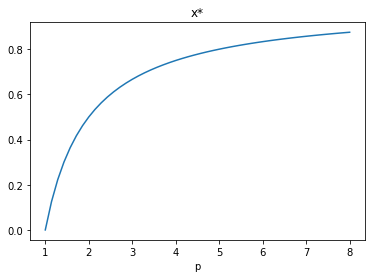

In [5]:
p = np.linspace(1, 8)
fx = (p-1)/p

plt.plot(p,fx)
plt.title('x*')
plt.xlabel('p')
plt.show()

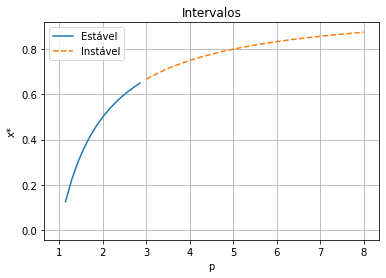

In [10]:
df_dx_x = p-2*p*fx

# 1) mask points where |df/dx|_x* < 1
fx_unstable = np.ma.masked_where(np.abs(df_dx_x) < 1, fx)

# 2) mask points where |df/dx|_x* >= 1
fx_stable = np.ma.masked_where(np.abs(df_dx_x) >= 1, fx)

plt.plot(p, fx_stable, '-', label='Estável')
plt.plot(p, fx_unstable, '--', label='Instável')
plt.legend()
plt.title('Intervalos')
plt.xlabel('p')
plt.ylabel('x*')
plt.grid()
plt.show()

# Atividade 66

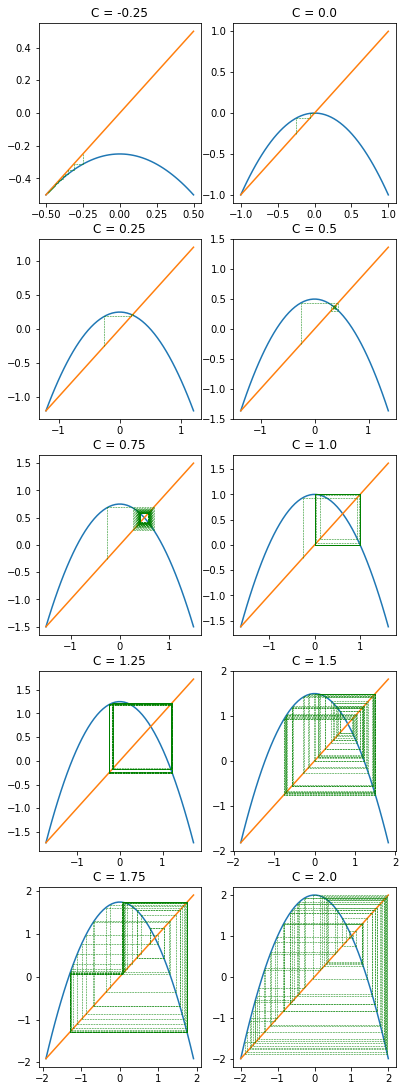

In [59]:
fig, ax = plt.subplots(5, 2, figsize=(6.4, 19.2))

def x_n1(xn, C): return C - xn**2

C = np.linspace(-.25,2,num=10)

for i in range(10):
    x_min = -((1+4*C[i])**(1/2) + 1)/2 
    x = np.linspace(x_min, -x_min)
    
    j = i//2
    k = i%2

    ax[j,k].plot(x, x_n1(x, C[i]))
    ax[j,k].plot(x, x)
    
    ax[j,k].set_title(f'C = {C[i]}')
    
    x1 = -.25
    for _ in range(64):
        x0 = x1
        x1 = x_n1(x0, C[i])
        ax[j,k].plot((x0,x0),(x0,x1), 'g--', linewidth=.5)
        ax[j,k].plot((x0,x1),(x1,x1), 'g--', linewidth=.5)

In [46]:
fig.figsize

AttributeError: 'Figure' object has no attribute 'figsize'